In [14]:
import kaggle_functions as kaggle
import tensorflow.keras as keras
import keras_tuner as kt
import matplotlib.pyplot as plt

In [2]:
x_train_complete, y_train_complete, x_train, y_train, x_test, y_test = kaggle.load_train_set()
x_test_real = kaggle.load_test_set()

## Simple NN 
#### Fails to generalize

In [24]:
def plot_model_history(history, labels=[]):
    label_count = len(labels)
    if label_count > 0:
        fig, axes = plt.subplots(1, label_count, figsize=(4*label_count, 4))
        for axis, label in zip(axes, labels):
            axis.plot(history.history[label], label=label)
            axis.set_xlabel('Epoch')
            axis.set_ylabel(label)
            axis.grid(True)

In [42]:
x_train_4d = x_train.reshape((-1, 96, 96, 1))
x_test_4d = x_test.reshape((-1, 96, 96, 1))

# Create simple NN
model = keras.models.Sequential([
  keras.layers.InputLayer((96,96,1)),
  # Used to reduce number of parameters (was too high to train)
  keras.layers.MaxPooling2D(pool_size=(2,2)),
  # Not a convnet, only a flat network
  keras.layers.Flatten(),
  # Standard ReLU activation, L2 regularizer to prevent overfitting
  keras.layers.Dense(
    256, activation='relu', 
    kernel_regularizer=keras.regularizers.l2(0.0001)),
  # Dropout to prevent overfitting
  keras.layers.Dropout(0.4),
  keras.layers.Dense(
    128, activation='relu',
    kernel_regularizer=keras.regularizers.l2(0.0001)),
  keras.layers.Dropout(0.4),
  keras.layers.Dense(11)
])

# Loss function
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Compile model
model.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=0.0003),
    loss=loss_fn,
    metrics=['accuracy'])
# model.summary()

# Early stopping
callbacks = [
  keras.callbacks.EarlyStopping(monitor='val_loss', patience=25),
]

# Fit model
history = model.fit(x_train_4d, y_train, epochs=250, validation_split=0.1, batch_size=32, callbacks=callbacks, verbose=2)

Epoch 1/250
268/268 - 4s - loss: 2.8844 - accuracy: 0.1593 - val_loss: 2.7248 - val_accuracy: 0.1851 - 4s/epoch - 15ms/step
Epoch 2/250
268/268 - 3s - loss: 2.6943 - accuracy: 0.1755 - val_loss: 2.6192 - val_accuracy: 0.1735 - 3s/epoch - 12ms/step
Epoch 3/250
268/268 - 3s - loss: 2.5935 - accuracy: 0.1825 - val_loss: 2.5276 - val_accuracy: 0.1682 - 3s/epoch - 12ms/step
Epoch 4/250
268/268 - 3s - loss: 2.5068 - accuracy: 0.1865 - val_loss: 2.4321 - val_accuracy: 0.2198 - 3s/epoch - 12ms/step
Epoch 5/250
268/268 - 3s - loss: 2.4487 - accuracy: 0.1843 - val_loss: 2.3854 - val_accuracy: 0.2124 - 3s/epoch - 12ms/step
Epoch 6/250
268/268 - 3s - loss: 2.3983 - accuracy: 0.1912 - val_loss: 2.3336 - val_accuracy: 0.2240 - 3s/epoch - 12ms/step
Epoch 7/250
268/268 - 3s - loss: 2.3610 - accuracy: 0.1972 - val_loss: 2.2968 - val_accuracy: 0.2198 - 3s/epoch - 12ms/step
Epoch 8/250
268/268 - 3s - loss: 2.3360 - accuracy: 0.2037 - val_loss: 2.2878 - val_accuracy: 0.2261 - 3s/epoch - 12ms/step
Epoch 9/

Fake test set:
Loss: 2.196	Accuracy: 0.271


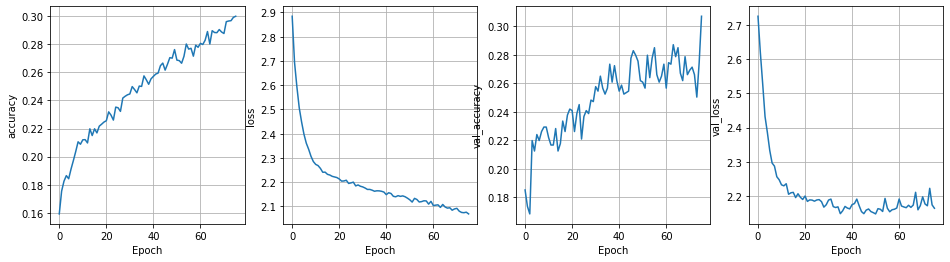

In [43]:
# Evaluate model
(test_loss, test_accuracy) = model.evaluate(x_test_4d, y_test, verbose=0)
print(f'Fake test set:\nLoss: {test_loss:.3f}\tAccuracy: {test_accuracy:.3f}')

plot_model_history(history, ['accuracy', 'loss', 'val_accuracy', 'val_loss'])